In [101]:
import string

import pandas as pd
MODEL_NAME_MAPPING = {
    "basic-linear-ridge": "BLR",
    "unscaled-linear": "ULR",
    "basic-randomforest": "BRF",
    "unscaled-randomforest": "URF",
    "unscaled-decisiontree": "UDT",
    "basic-adaboost": "BAB",
    "basic-gradientboost": "BGB"
}


partial_results = [
    "../../data/experiment2-final/r_1.csv",
    "../../data/experiment2-final/r_2.csv",
    "../../data/experiment2-final/r_3.csv",
    "../../data/experiment2-final/r_4.csv"
]

results = pd.concat([pd.read_csv(filepath_or_buffer=p, sep=',') for p in partial_results])

description = results.filter(["metric_set", "smell_models", "model_type", "real_mcc", "real_precision"]).groupby(["metric_set", "smell_models", "model_type"]).describe()
description

real_mcc            \
                                                             count      mean   
metric_set             smell_models model_type                                 
JAVAMETRICS2_AgeInDays False        basic-linear-ridge        12.0  0.000000   
                                    unscaled-decisiontree     12.0  0.191830   
                                    unscaled-randomforest     12.0  0.190551   
                       True         basic-linear-ridge        12.0  0.271898   
                                    unscaled-decisiontree     12.0  0.245598   
...                                                            ...       ...   
nuc                    False        unscaled-decisiontree     12.0  0.199295   
                                    unscaled-randomforest     12.0  0.213149   
                       True         basic-linear-ridge        12.0  0.151698   
                                    unscaled-decisiontree     12.0  0.275730   
                                    unscaled-randomforest     12.0  0.282790   

                                                                               \
                                                                std       min   
metric_set             smell_models model_type                                  
JAVAMETRICS2_AgeInDays False        basic-linear-ridge     0.000000  0.000000   
                                    unscaled-decisiontree  0.007211  0.181285   
                                    unscaled-randomforest  0.007339  0.179603   
                       True         basic-linear-ridge     0.004135  0.265165   
                                    unscaled-decisiontree  0.004405  0.236706   
...                                                             ...       ...   
nuc                    False        unscaled-decisiontree  0.007763  0.185644   
                                    unscaled-randomforest  0.007650  0.200190   
                       True         basic-linear-ridge     0.004019  0.143030   
                                    unscaled-decisiontree  0.006879  0.262112   
                                    unscaled-randomforest  0.007251  0.267902   

                                                                               \
                                                                25%       50%   
metric_set             smell_models model_type                                  
JAVAMETRICS2_AgeInDays False        basic-linear-ridge     0.000000  0.000000   
                                    unscaled-decisiontree  0.185857  0.191156   
                                    unscaled-randomforest  0.185479  0.191550   
                       True         basic-linear-ridge     0.269227  0.271856   
                                    unscaled-decisiontree  0.243148  0.245471   
...                                                             ...       ...   
nuc                    False        unscaled-decisiontree  0.194233  0.201068   
                                    unscaled-randomforest  0.208523  0.213583   
                       True         basic-linear-ridge     0.150661  0.152611   
                                    unscaled-decisiontree  0.271661  0.275144   
                                    unscaled-randomforest  0.278262  0.282233   

                                                                               \
                                                                75%       max   
metric_set             smell_models model_type                                  
JAVAMETRICS2_AgeInDays False        basic-linear-ridge     0.000000  0.000000   
                                    unscaled-decisiontree  0.197936  0.202432   
                                    unscaled-randomforest  0.194072  0.204087   
                       True         basic-linear-ridge     0.275136  0.279575   
                                    unscaled-decisiontree  0.247818  0.253508   
...                

In [102]:
import string

series = description.filter([("real_mcc", "50%"), ("real_precision", "50%")]).reset_index()
series["MCC"] = series[("real_mcc", "50%")]
series["Precision"] = series[("real_precision", "50%")]
series = series.drop(columns=[("real_mcc", "50%"), ("real_precision", "50%")])

incl_smells = series[series["smell_models"] == True].drop(columns=["smell_models"])
excl_smells = series[series["smell_models"] == False].drop(columns=["smell_models"])

final_series = incl_smells.merge(excl_smells, on=("metric_set", "model_type"), suffixes=(" (smells)", " (no smells)"))

final_series = final_series[["metric_set", "model_type", "MCC (smells)", "MCC (no smells)", "Precision (smells)", "Precision (no smells)"]]
final_series["metric_set"] = final_series["metric_set"].map(lambda x: x.replace("JAVAMETRICS", "JM"))
final_series["metric_set"] = final_series["metric_set"].map(lambda x: x.replace("_", "\\_"))

final_series["model_type"] = final_series["model_type"].map(MODEL_NAME_MAPPING)

remove_lowercase = str.maketrans('','', string.ascii_lowercase)
final_series["metric_set"] = final_series["metric_set"].map(lambda x: x.upper() if x.islower() else x.translate(remove_lowercase))
final_series = final_series.rename(columns={"model_type": "Model", "metric_set": "Metric set"})

final_series = final_series.sort_values(by=['MCC (no smells)'], ascending=False)

final_series = final_series.reset_index(drop=True)
final_series.index += 1
final_series.style.to_latex(
    buf="performance-metrics-single.tex",
    caption="Prediction performance measures for single metric scenario",
    label="Appendix:DataTableSingle",
    environment = "longtable"
)

final_series

C:\Users\Ja\AppData\Local\Temp\ipykernel_308\4016286907.py:8: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  incl_smells = series[series["smell_models"] == True].drop(columns=["smell_models"])
C:\Users\Ja\AppData\Local\Temp\ipykernel_308\4016286907.py:9: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  excl_smells = series[series["smell_models"] == False].drop(columns=["smell_models"])
C:\Users\Ja\AppData\Local\Temp\ipykernel_308\4016286907.py:11: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  final_series = incl_smells.merge(excl_smells, on=("metric_set", "model_type"), suffixes=(" (smells)", " (no smells)"))


,Metric set,Model,MCC (smells),MCC (no smells),Precision (smells),Precision (no smells)
,,,,,,
1,JM2\_MAC,UDT,0.350439,0.358222,0.437744,0.465042
2,JM2\_MAC,URF,0.340070,0.349462,0.426474,0.453606
3,LA,URF,0.386580,0.304509,0.562784,0.619198
4,LA,UDT,0.379659,0.293839,0.567304,0.620842
5,JM2\_MNOAL,UDT,0.298613,0.279531,0.405375,0.411367
...,...,...,...,...,...,...
221,AREXP,BLR,0.249242,0.000000,0.460955,0.000000
222,JM2\_AID,BLR,0.271856,0.000000,0.416832,0.000000
223,NUC,BLR,0.152611,-0.006270,0.495454,0.260739


<AxesSubplot: xlabel='Include smell models', ylabel='MCC'>

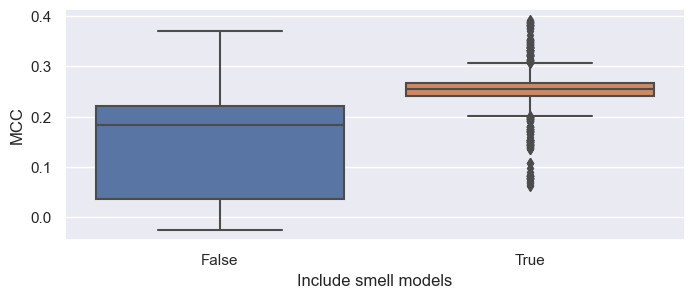

In [103]:
import seaborn as sns
import matplotlib.pyplot as pyplot

sns.set(rc={'figure.figsize': (8.0, 3.0)})

smellchart_data = results.filter(["real_mcc", "smell_models"])
smellchart_data["MCC"] = smellchart_data["real_mcc"]
smellchart_data["Include smell models"] = smellchart_data["smell_models"]

smells_mcc = sns.boxplot(
    smellchart_data, y="MCC", x="Include smell models"
)

smells_mcc.get_figure().savefig("single_mcc_smells.png")
smells_mcc


<AxesSubplot: xlabel='Include smell models', ylabel='Precision'>

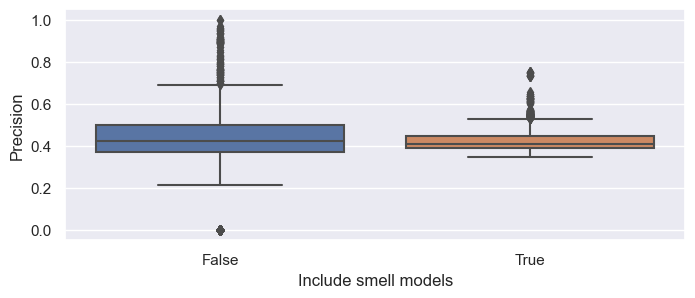

In [104]:
prec_smellchart_data = results.filter(["real_precision", "smell_models"])
prec_smellchart_data["Precision"] = prec_smellchart_data["real_precision"]
prec_smellchart_data["Include smell models"] = prec_smellchart_data["smell_models"]

smells_precision = sns.boxplot(
    prec_smellchart_data, y="Precision", x="Include smell models"
)

smells_precision.get_figure().savefig("single_precision_smells.png")
smells_precision


<AxesSubplot: xlabel='ML model', ylabel='MCC'>

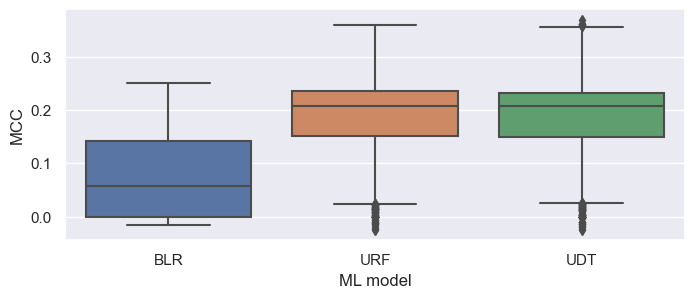

In [105]:

modeltype_data = results.loc[results.smell_models == False].filter(["real_mcc", "model_type"])
modeltype_data["MCC"] = modeltype_data["real_mcc"]
modeltype_data["ML model"] = modeltype_data["model_type"].map(MODEL_NAME_MAPPING)

models_mcc = sns.boxplot(
    modeltype_data, y="MCC", x="ML model"
)

models_mcc.get_figure().savefig("single_mcc_models.png")
models_mcc


<AxesSubplot: xlabel='ML model', ylabel='Precision'>

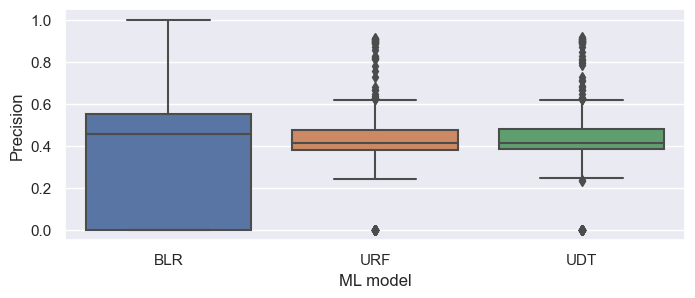

In [106]:
prec_modeltype_data = results.loc[results.smell_models == False].filter(["real_precision", "model_type"])
prec_modeltype_data["Precision"] = prec_modeltype_data["real_precision"]
prec_modeltype_data["ML model"] = prec_modeltype_data["model_type"].map(MODEL_NAME_MAPPING)

models_precision = sns.boxplot(
    prec_modeltype_data, y="Precision", x="ML model"
)

models_precision.get_figure().savefig("single_precision_models.png")
models_precision


<AxesSubplot: xlabel='Metric set', ylabel='MCC'>

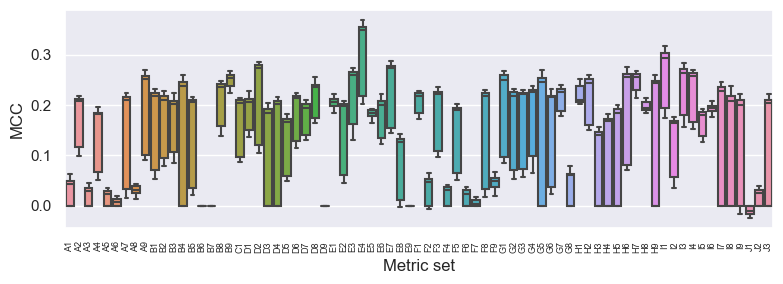

In [107]:
metrictype_data = results.loc[results.smell_models == False].filter(["real_mcc", "metric_set"])
METRIC_SET_MAPPING = {
    "JAVAMETRICS_LD": "A1",
    "JAVAMETRICS_LOC_C": "A2",
    "JAVAMETRICS_MRD": "A3",
    "JAVAMETRICS_NOAM": "A4",
    "JAVAMETRICS_NOL_C": "A5",
    "JAVAMETRICS_NOMR_C": "A6",
    "JAVAMETRICS_NOM": "A7",
    "JAVAMETRICS_NOMM": "A8",
    "JAVAMETRICS_NOPA": "A9",
    "JAVAMETRICS_NOPV": "B1",
    "JAVAMETRICS_WMC": "B2",
    "JAVAMETRICS_WMCNAMM": "B3",
    "JAVAMETRICS_WOC": "B4",
    "JAVAMETRICS_NPM": "B5",
    "JAVAMETRICS_NOSE_C": "B6",
    "JAVAMETRICS_NOTB_C": "B7",
    "JAVAMETRICS_LDVC_C": "B8",
    "JAVAMETRICS_NDCWC": "B9",
    "JAVAMETRICS_LMNC": "C1",
    "JAVAMETRICS2_AverageNumberOfAddedLines": "D1",
    "JAVAMETRICS2_MaxNumberOfAddedLines": "D2",
    "JAVAMETRICS2_AgeInDays": "D3",
    "JAVAMETRICS2_AverageNumberOfDaysBetweenChanges": "D4",
    "JAVAMETRICS2_NumberOfBugFixes": "D5",
    "JAVAMETRICS2_CodeChurn": "D6",
    "JAVAMETRICS2_MeanCommitMessageLength": "D7",
    "JAVAMETRICS2_NumberOfRevisions": "D8",
    "JAVAMETRICS2_NumberOfCommitsWithoutMessage": "D9",
    "JAVAMETRICS2_DaysWithCommits": "E1",
    "JAVAMETRICS2_AverageNumberOfDeletedLines": "E2",
    "JAVAMETRICS2_MaxNumberOfDeletedLines": "E3",
    "JAVAMETRICS2_MeanAuthorCommits": "E4",
    "JAVAMETRICS2_NumberOfDistinctCommitters": "E5",
    "JAVAMETRICS2_AverageNumberOfModifiedLines": "E6",
    "JAVAMETRICS2_MaxNumberOfModifiedLines": "E7",
    "JAVAMETRICS2_NumberOfRefactorings": "E8",
    "JAVAMETRICS2_AuthorFragmentation": "E9",
    "JAVAMETRICS2_DaysPassedSinceTheLastChange": "F1",
    "JAVAMETRICS2_LambdaDensity": "F2",
    "JAVAMETRICS2_LinesOfCode": "F3",
    "JAVAMETRICS2_MethodReferenceDensity": "F4",
    "JAVAMETRICS2_NumberOfAccessorMethods": "F5",
    "JAVAMETRICS2_NumberOfLambdaExpressions": "F6",
    "JAVAMETRICS2_NumberOfMethodReferences": "F7",
    "JAVAMETRICS2_NumberOfMethods": "F8",
    "JAVAMETRICS2_NumberOfMutatorMethods": "F9",
    "JAVAMETRICS2_NumberOfPublicFields": "G1",
    "JAVAMETRICS2_NumberOfPrivateFields": "G2",
    "JAVAMETRICS2_WeightedMethodsPerClass": "G3",
    "JAVAMETRICS2_WeightedMethodsPerClassWithoutAccessorAndMutatorMethods": "G4",
    "JAVAMETRICS2_WeightOfClass": "G5",
    "JAVAMETRICS2_NumberOfPublicMethods": "G6",
    "JAVAMETRICS2_ResponseForClass": "G7",
    "JAVAMETRICS2_NumberOfFieldAnnotations": "G8",
    "PMD_ATFD": "H1",
    "PMD_CLASS_FAN_OUT": "H2",
    "PMD_LOC": "H3",
    "PMD_NCSS": "H4",
    "PMD_NOAM": "H5",
    "PMD_NOPA": "H6",
    "PMD_TCC": "H7",
    "PMD_WMC": "H8",
    "PMD_WOC": "H9",
    "la": "I1",
    "ld": "I2",
    "nf": "I3",
    "nd": "I4",
    "ns": "I5",
    "ent": "I6",
    "ndev": "I7",
    "age": "I8",
    "nuc": "I9",
    "aexp": "J1",
    "arexp": "J2",
    "asexp": "J3",
}


metrictype_data["Metric set"] = metrictype_data["metric_set"].map(METRIC_SET_MAPPING)

metrics_mcc = sns.boxplot(
    metrictype_data, y="real_mcc", x="Metric set"
)
metrics_mcc.set_xticklabels(metrics_mcc.get_xticklabels(), rotation=90)
pyplot.tick_params(axis="x", which="major", labelsize=6.5)
pyplot.tight_layout()

metrics_mcc.set(xlabel = "Metric set", ylabel = "MCC")

metrics_mcc.get_figure().savefig("single_mcc_metrics.png")
metrics_mcc

<AxesSubplot: xlabel='Metric set', ylabel='Precision'>

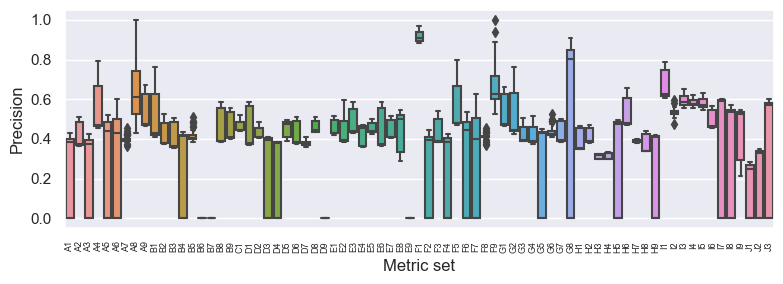

In [108]:
metrictype_data = results.loc[results.smell_models == False].filter(["real_precision", "metric_set"])
metrictype_data["Metric set"] = metrictype_data["metric_set"].map(METRIC_SET_MAPPING)

metrics_precision = sns.boxplot(
    metrictype_data, y="real_precision", x="Metric set"
)

metrics_precision.set(xlabel="Metric set", ylabel="Precision")
metrics_precision.set_xticklabels(metrics_precision.get_xticklabels(), rotation=90)
pyplot.tick_params(axis="x", which="major", labelsize=6.5)
pyplot.tight_layout()

metrics_precision.get_figure().savefig("single_precision_metrics.png")
metrics_precision

In [109]:
metric_describable_data = results.filter(["real_precision", "real_mcc", "metric_set", "smell_models"])
metric_describable_data["mcc"] = metric_describable_data["real_mcc"]
metric_describable_data["precision"] = metric_describable_data["real_precision"]
metric_describable_data = metric_describable_data.filter(["precision", "mcc", "metric_set", "smell_models"])


grouped_data = metric_describable_data.groupby(["metric_set", "smell_models"]).describe()
grouped_data.style.to_latex(buf = "metrics-singlemetric.tex")
grouped_data

precision            \
                                                        count      mean   
metric_set                             smell_models                       
JAVAMETRICS2_AgeInDays                 False             36.0  0.267578   
                                       True              36.0  0.396144   
JAVAMETRICS2_AuthorFragmentation       False             36.0  0.000000   
                                       True              36.0  0.474672   
JAVAMETRICS2_AverageNumberOfAddedLines False             36.0  0.439790   
...                                                       ...       ...   
none                                   True              36.0  0.459681   
ns                                     False             36.0  0.580584   
                                       True              36.0  0.522032   
nuc                                    False             36.0  0.443462   
                                       True              36.0  0.488909   

                                                                         \
                                                          std       min   
metric_set                             smell_models                       
JAVAMETRICS2_AgeInDays                 False         0.191940  0.000000   
                                       True          0.015726  0.378638   
JAVAMETRICS2_AuthorFragmentation       False         0.000000  0.000000   
                                       True          0.030051  0.449180   
JAVAMETRICS2_AverageNumberOfAddedLines False         0.094572  0.367663   
...                                                       ...       ...   
none                                   True          0.009155  0.445638   
ns                                     False         0.026323  0.545821   
                                       True          0.020058  0.497663   
nuc                                    False         0.128838  0.213740   
                                       True          0.009619  0.469633   

                                                                         \
                                                          25%       50%   
metric_set                             smell_models                       
JAVAMETRICS2_AgeInDays                 False         0.000000  0.396958   
                                       True          0.383726  0.389236   
JAVAMETRICS2_AuthorFragmentation       False         0.000000  0.000000   
                                       True          0.451673  0.455639   
JAVAMETRICS2_AverageNumberOfAddedLines False         0.372763  0.377424   
...                                                       ...       ...   
none                                   True          0.453524  0.458296   
ns                                     False         0.561119  0.572731   
                                       True          0.508397  0.510245   
nuc                                    False         0.293522  0.523969   
                                       True          0.482461  0.489587   

                                                                          mcc  \
                                                          75%       max count   
metric_set                             smell_models                             
JAVAMETRICS2_AgeInDays                 False         0.402852  0.411139  36.0   
                                       True          0.416079  0.421816  36.0   
JAVAMETRICS2_AuthorFragmentation       False         0.000000  0.000000  36.0   
                                       True          0.509812  0.528855  36.0   
JAVAMETRICS2_AverageNumberOfAddedLines False         0.564178  0.587347  36.0   
...                                                       ...       ...   ...   
none                                   True          0.465634  0.485526  36.0   
ns                                     False         0.603195  0.631158  36.0   
        

In [110]:
from effect_size_analysis.cliff_delta import cliff_delta

def calculate_cliff_deltas(all_results, column):
    descriptors = all_results[column].unique()
    cds = {}
    descriptors_1 = []
    descriptors_2 = []
    cd_mcc = []
    cd_mcc_min = []
    cd_mcc_max = []
    cd_prec = []
    cd_prec_min = []
    cd_prec_max = []
    
    descriptors_count = len(descriptors)
    for i in range(descriptors_count):
        item_1 = results[results[column] == descriptors[i]]
        for j in range(i + 1, descriptors_count):
            item_2 = results[results[column] == descriptors[j]]
            descriptors_1.append(descriptors[i])
            descriptors_2.append(descriptors[j])
            cd_mcc_curr = cliff_delta(item_1["real_mcc"], item_2["real_mcc"], alpha=0.05, accurate_ci=True)
            cd_mcc.append(cd_mcc_curr[0])
            cd_mcc_min.append(cd_mcc_curr[1][0])
            cd_mcc_max.append(cd_mcc_curr[1][1])
            cd_prec_curr = cliff_delta(item_1["real_precision"], item_2["real_precision"], alpha=0.05, accurate_ci=True)
            cd_prec.append(cd_prec_curr[0])
            cd_prec_min.append(cd_prec_curr[1][0])
            cd_prec_max.append(cd_prec_curr[1][1])    
    return pd.DataFrame({"descriptor_1": descriptors_1, "descriptor_2": descriptors_2, "CD MCC min": cd_mcc_min, "CD MCC": cd_mcc, "CD MCC max": cd_mcc_max, "CD precision min": cd_prec_min, "CD precision": cd_prec, "CD precision max": cd_prec_max})
    

In [111]:
calculate_cliff_deltas(results, "model_type")

,descriptor_1,descriptor_2,CD MCC min,CD MCC,CD MCC max,CD precision min,CD precision,CD precision max
0,basic-linear-ridge,unscaled-randomforest,-0.288496,-0.252033,-0.214840,0.008722,0.046851,0.084845
1,basic-linear-ridge,unscaled-decisiontree,-0.296451,-0.260177,-0.223155,-0.013482,0.024650,0.062710
2,unscaled-randomforest,unscaled-decisiontree,-0.048060,-0.010501,0.027088,-0.069804,-0.032291,0.005313


In [112]:
calculate_cliff_deltas(results, "metric_set")

L:\PhD\defect-prediction\runners\init\lib\site-packages\effect_size_analysis\cliff_delta.py:94: RuntimeWarning: invalid value encountered in double_scalars
  (delta_val - delta_val ** 3 - ci_size) / denom_corretion,
L:\PhD\defect-prediction\runners\init\lib\site-packages\effect_size_analysis\cliff_delta.py:95: RuntimeWarning: invalid value encountered in double_scalars
  (delta_val - delta_val ** 3 + ci_size) / denom_corretion,


,descriptor_1,descriptor_2,CD MCC min,CD MCC,CD MCC max,CD precision min,CD precision,CD precision max
0,none,JAVAMETRICS_LD,-0.346230,0.073302,0.468403,0.942940,0.994599,0.999501
1,none,JAVAMETRICS_LOC_C,-0.580204,-0.314815,0.011008,0.211310,0.668981,0.886053
2,none,JAVAMETRICS_MRD,-0.372201,0.049383,0.454075,0.818888,0.952160,0.988010
3,none,JAVAMETRICS_NOAM,-0.551077,-0.223765,0.163221,-0.238856,0.166667,0.522689
4,none,JAVAMETRICS_NOL_C,-0.409952,0.013889,0.432797,0.108572,0.534722,0.794850
...,...,...,...,...,...,...,...,...
2845,nuc,arexp,0.083705,0.276620,0.449550,0.554419,0.729552,0.842811
2846,nuc,asexp,-0.288808,-0.097608,0.101079,-0.071976,0.138117,0.336475
2847,aexp,arexp,-0.450593,-0.277392,-0.084066,-0.276872,-0.089120,0.105186
2848,aexp,asexp,-0.748292,-0.635031,-0.485796,-0.755748,-0.621914,-0.438210


In [113]:
calculate_cliff_deltas(results, "smell_models")

,descriptor_1,descriptor_2,CD MCC min,CD MCC,CD MCC max,CD precision min,CD precision,CD precision max
0,True,False,0.729761,0.749872,0.768686,-0.072463,-0.040588,-0.008629
